In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



 Data Cleaning

In [453]:
df = pd.read_csv("London_Listings.csv")
print("Initial shape of dataset:", df.shape)
df.head()

Initial shape of dataset: (66679, 31)


,id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities,price,minimum_nights,maximum_nights,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count
0,2.763150e+07,1,NaN,35877912,Alex,15/06/2015,NaN,NaN,f,1.0,...,"[""Kitchen"", ""Refrigerator"", ""Microwave"", ""Free...",$200.00,1,1125,14/06/2024,0,NaN,NaN,NaN,1
1,1.100000e+18,1,Get comfortable and enjoy plenty of extra room...,564055882,Lili-Ann,26/02/2024,NaN,NaN,f,1.0,...,[],$675.00,1,365,15/06/2024,0,NaN,NaN,NaN,1
2,1.170000e+18,117,Keep it simple at this peaceful and centrally-...,528033284,Shujauddin,26/07/2023,86%,50%,f,2.0,...,"[""Washer"", ""Wifi"", ""Kitchen""]",$95.00,1,365,16/06/2024,0,NaN,NaN,NaN,2
3,8.730000e+17,- Bright Central London Apartment -,My apartment has everything you possibly need ...,99268099,Alex,11/10/2016,98%,93%,t,5.0,...,"[""Microwave"", ""Hot water kettle"", ""Body soap"",...",$166.00,7,365,16/06/2024,24,24/04/2023,02/05/2024,4.83,1
4,4.672403e+07,""" Bright & Cosy Loft apartment """,Lovely and cosy arctic space with a separate d...,359199241,Karol,29/07/2020,100%,95%,t,1.0,...,"[""Cleaning products"", ""Cooking basics"", ""First...",$105.00,2,60,14/06/2024,46,20/08/2021,02/06/2024,4.89,1


In [454]:
#  Separate Categorical and Numerical Columns
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical variables:\n", categorical_vars)
print("\nNumerical variables:\n", numerical_vars)


Categorical variables:
 ['name', 'description', 'host_name', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'calendar_last_scraped', 'first_review', 'last_review']

Numerical variables:
 ['id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count']


In [455]:
# Clean the 'price' column
df['price'] = df['price'].replace('[\\$,]', '', regex=True).astype(float)

# Replace empty strings/lists with NaN in categorical columns
df[categorical_vars] = df[categorical_vars].replace(['', '[]'], np.nan)

# Show missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print("Missing Values:\n", missing_summary)

# Summary statistics before dropping
df.describe(include='all')


Missing Values:
 description                   1956
host_name                        1
host_since                       1
host_response_rate           10175
host_acceptance_rate          7146
host_is_superhost              380
host_listings_count              1
host_total_listings_count        1
bathrooms                     5329
bathrooms_text                 100
bedrooms                       101
beds                          5400
amenities                      136
price                         5261
first_review                 14736
last_review                  14736
review_scores_rating         14736
dtype: int64


,id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities,price,minimum_nights,maximum_nights,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count
count,6.667900e+04,66679,64723,6.667900e+04,66678,66678,56504,59533,66299,66678.000000,...,66543,61418.000000,66679.000000,6.667900e+04,66679,66679.000000,51943,51943,51943.000000,66679.000000
unique,NaN,64452,56516,NaN,12105,4938,90,101,2,NaN,...,61161,NaN,NaN,NaN,4,NaN,4091,2361,NaN,NaN
top,NaN,Flat in London,Enjoy a stylish experience at this centrally-l...,NaN,James,03/12/2019,100%,100%,f,NaN,...,"[""Kitchen"", ""Smoke alarm"", ""Wifi"", ""TV"", ""Wash...",NaN,NaN,NaN,15/06/2024,NaN,21/04/2024,09/06/2024,NaN,NaN
freq,NaN,25,344,NaN,627,440,39499,20102,50536,NaN,...,81,NaN,NaN,NaN,28957,NaN,260,1772,NaN,NaN
mean,6.129241e+17,NaN,NaN,2.058000e+08,NaN,NaN,NaN,NaN,NaN,28.557110,...,NaN,209.987202,5.207742,8.328149e+03,NaN,23.855352,NaN,NaN,4.696031,16.794538
std,4.728136e+17,NaN,NaN,1.975357e+08,NaN,NaN,NaN,NaN,NaN,152.576905,...,NaN,961.450873,19.090368,2.032567e+06,NaN,51.321841,NaN,NaN,0.450932,52.043637
min,1.391300e+04,NaN,NaN,2.594000e+03,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,0.000000,1.000000,1.000000e+00,NaN,0.000000,NaN,NaN,1.000000,1.000000
25%,3.982489e+07,NaN,NaN,2.764800e+07,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,78.000000,1.000000,9.000000e+01,NaN,1.000000,NaN,NaN,4.590000,1.000000
50%,8.040000e+17,NaN,NaN,1.274832e+08,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,138.000000,2.000000,3.650000e+02,NaN,7.000000,NaN,NaN,4.830000,2.000000
75%,1.030000e+18,NaN,NaN,4.024643e+08,NaN,NaN,NaN,NaN,NaN,11.000000,...,NaN,227.000000,4.000000,7.300000e+02,NaN,24.000000,NaN,NaN,5.000000,9.000000


In [456]:
# Drop unnecessary columns
drop_cols = ['calendar_last_scraped', 'bathrooms_text', 'latitude', 'longitude']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with NaNs
df.dropna(inplace=True)
print("Shape after dropping NaNs and unnecessary columns:", df.shape)


Shape after dropping NaNs and unnecessary columns: (41888, 27)


In [457]:
# Outlier removal using IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (39323, 27)


In [458]:
# Log-transform 'price' column
df['log_price'] = np.log1p(df['price'])

# Recalculate numerical variables list after dropping columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars = [col for col in numerical_vars if col not in ['price', 'log_price']]

# Normalize numerical columns
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

df.head()


,id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities,price,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,calculated_host_listings_count,log_price
3,0.615996,- Bright Central London Apartment -,My apartment has everything you possibly need ...,-0.514312,Alex,11/10/2016,98%,93%,t,-0.218681,...,"[""Microwave"", ""Hot water kettle"", ""Body soap"",...",166.0,0.208797,-0.005078,-0.135832,24/04/2023,02/05/2024,0.314109,-0.324992,5.117994
4,-1.286890,""" Bright & Cosy Loft apartment """,Lovely and cosy arctic space with a separate d...,0.826490,Karol,29/07/2020,100%,95%,t,-0.273176,...,"[""Cleaning products"", ""Cooking basics"", ""First...",105.0,-0.156834,-0.005193,0.231597,20/08/2021,02/06/2024,0.445238,-0.324992,4.663439
6,0.576761,"""Bijou"" in Sloane square",I AM HOSTING THIS ON BEHALF of my friend Angie...,0.503854,Felicity Ann,21/09/2019,100%,97%,t,-0.218681,...,"[""Pack \u2019n play/Travel crib - available up...",280.0,1.744447,-0.005078,-0.519963,27/12/2023,27/12/2023,0.685643,-0.282429,5.638355
7,-1.286890,"""Blue heaven""-chic House in quiet central loca...",Pretty light-filled Victorian 3 storey house w...,-0.913310,Vivien,29/09/2014,90%,72%,f,-0.232305,...,"[""First aid kit"", ""Microwave"", ""Body soap"", ""C...",360.0,0.135671,-0.004791,-0.436456,04/08/2018,27/08/2023,0.314109,-0.261148,5.888878
11,0.790373,"""Charming & Cozy Studio""",Our studio is ideally situated within easy rea...,1.710615,Silvia,08/08/2023,70%,65%,t,-0.273176,...,"[""Dining table"", ""Single level home"", ""Bathtub...",82.0,-0.156834,-0.005205,-0.336248,08/09/2023,18/12/2023,0.685643,-0.324992,4.418841


In [459]:
df.columns

Index(['id', 'name', 'description', 'host_id', 'host_name', 'host_since',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'calculated_host_listings_count', 'log_price'],
      dtype='object')

Data Visualisation Before the Model Building

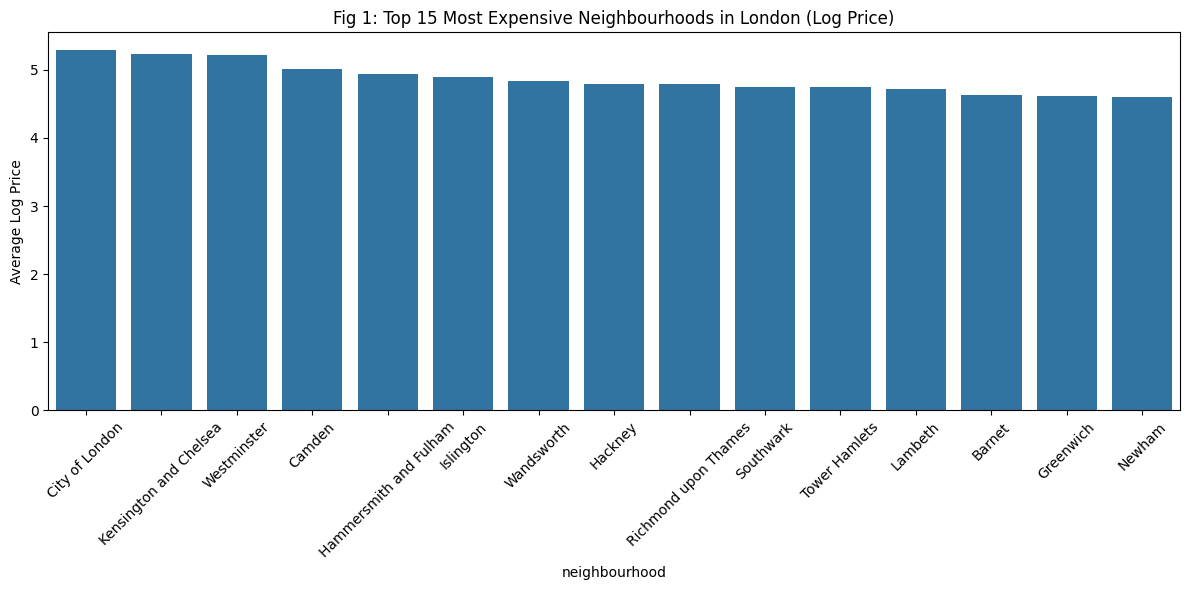

In [460]:
# Neighbourhood Price Distribution

# Compute average log prices by neighbourhood

top_neighbour = df.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighbour.index, y=top_neighbour.values)
plt.xticks(rotation=45)
plt.ylabel("Average Log Price")
plt.title("Fig 1: Top 15 Most Expensive Neighbourhoods in London (Log Price)")
plt.tight_layout()
plt.show()

plt.show()



 This bargroah compares the distribution of Airbnb log prices across the 15 most expensive London neighbourhoods.
   -  The City of London, Kensington and Chelsea, and Westminster are the priciest, with higher medians and tighter spreads.
   -  Listings in Newham and Greenwich fall on the lower end



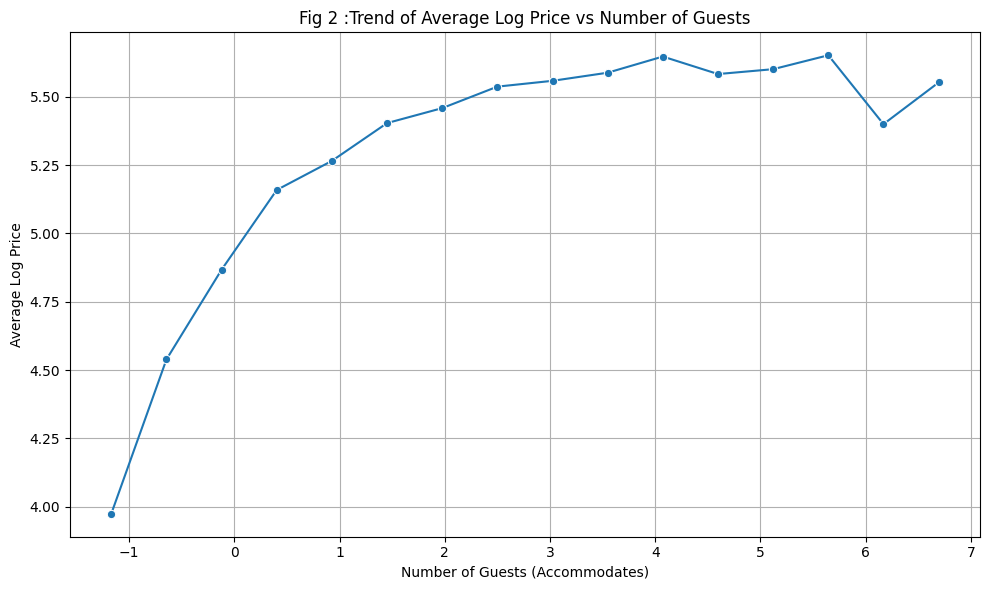

In [461]:
# Price vs Accommodates (number of tenants)
accom_price = df.groupby('accommodates')['log_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='accommodates', y='log_price', data=accom_price, marker='o')
plt.title("Fig 2 :Trend of Average Log Price vs Number of Guests")
plt.xlabel("Number of Guests (Accommodates)")
plt.ylabel("Average Log Price")
plt.grid(True)
plt.tight_layout()
plt.show()



There's a clear upward trend from 1 to 4 guests — as the number of guests a property can accommodate increases, so does the average log price.
   - The growth plateaus around 4-5 guests, and becomes less consistent or even slightly noisy beyond that.
   - Accommodates is positively correlated with price, especially for smaller to mid-sized properties. 
   - After a certain point, additional space doesn't linearly increase price — probably due to market ceiling effects or niche large listings.

Notes : 

Now, prices can be all over the place — some places for 4 guests might be £50/night, others £500/night. To summarise this and avoid the noise from outliers, we:
1.Take the average price (or log price) for each accommodates value.
2.Plot those averages to see the overall trend.

But why log price and not raw price?
The log of price is used because:
The original prices are highly skewed (a few super expensive listings distort everything).
Log transformation makes price distributions more normal, which is better for:
- Visualisation
- Interpretability
- Linear regression models

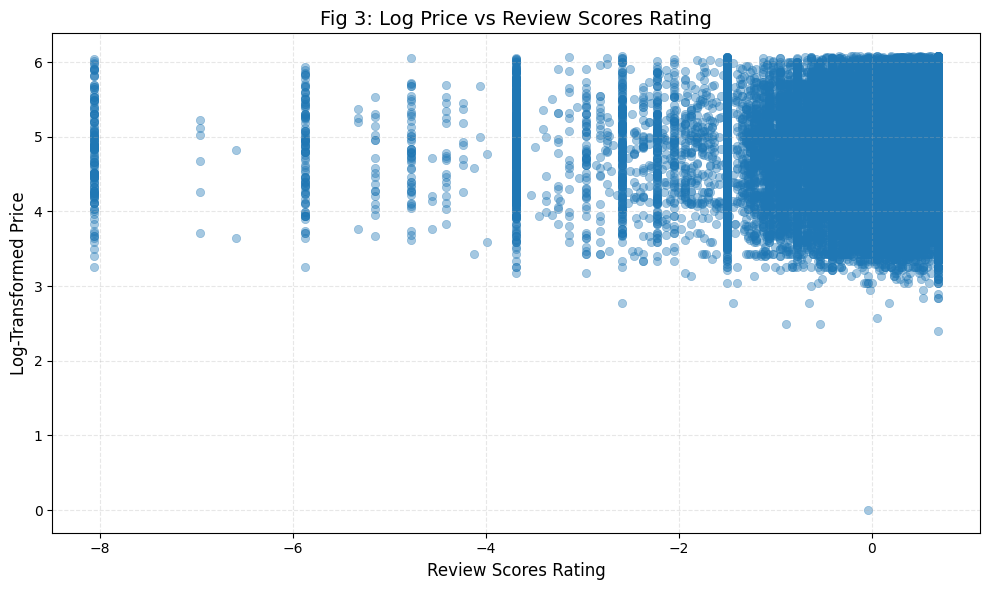

In [462]:
# Improved Scatterplot: Review Scores Rating vs Log Price

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='review_scores_rating', 
    y='log_price', 
    data=df[df['review_scores_rating'].notna()],  # remove nulls
    alpha=0.4,
    edgecolor=None
)

# Add some plot customisation
plt.title("Fig 3: Log Price vs Review Scores Rating", fontsize=14)
plt.xlabel("Review Scores Rating", fontsize=12)
plt.ylabel("Log-Transformed Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




The scatterplot shows no strong linear relationship between price and review scores.
  -  Most listings cluster around higher review scores (4.5 to 5), but within that range, price varies a lot.
  -  The large number of values stacked near zero may indicate missing or transformed data.


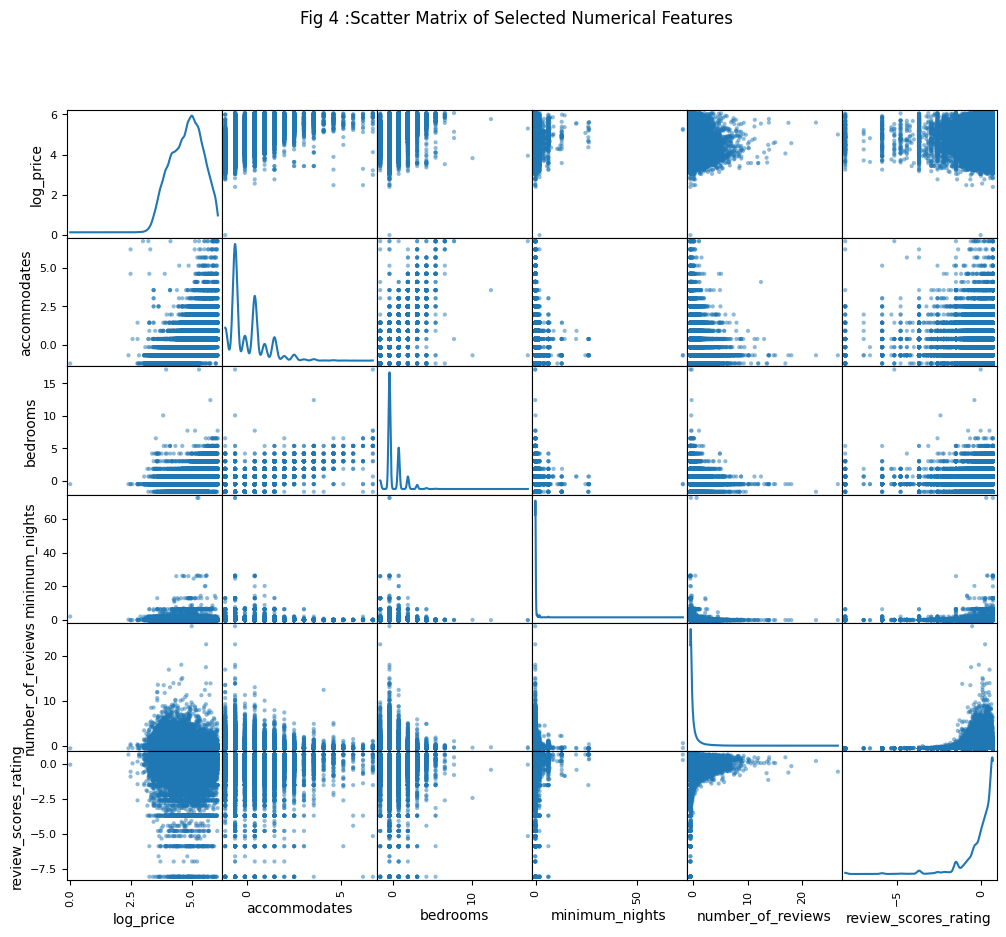

In [463]:
# Scatter Matrix (Pairplot)

from pandas.plotting import scatter_matrix

selected_features = ['log_price', 'accommodates', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']
scatter_matrix(df[selected_features], figsize=(12, 10), diagonal='kde')
plt.suptitle("Fig 4 :Scatter Matrix of Selected Numerical Features")
plt.show()


This matrix shows how multiple numerical variables interact. Key observations:
   - Strong visible linear trends between log_price and accommodates, and between accommodates and bedrooms.
   - minimum_nights, number_of_reviews, and review_scores_rating show no clear trends with price.
   - Most variables are skewed — justified the earlier log-transform and normalization.

Scatter matrices are great for identifying multicollinearity and for seeing how variables relate before building a regression model. Here, accommodates and bedrooms stand out as solid predictors.

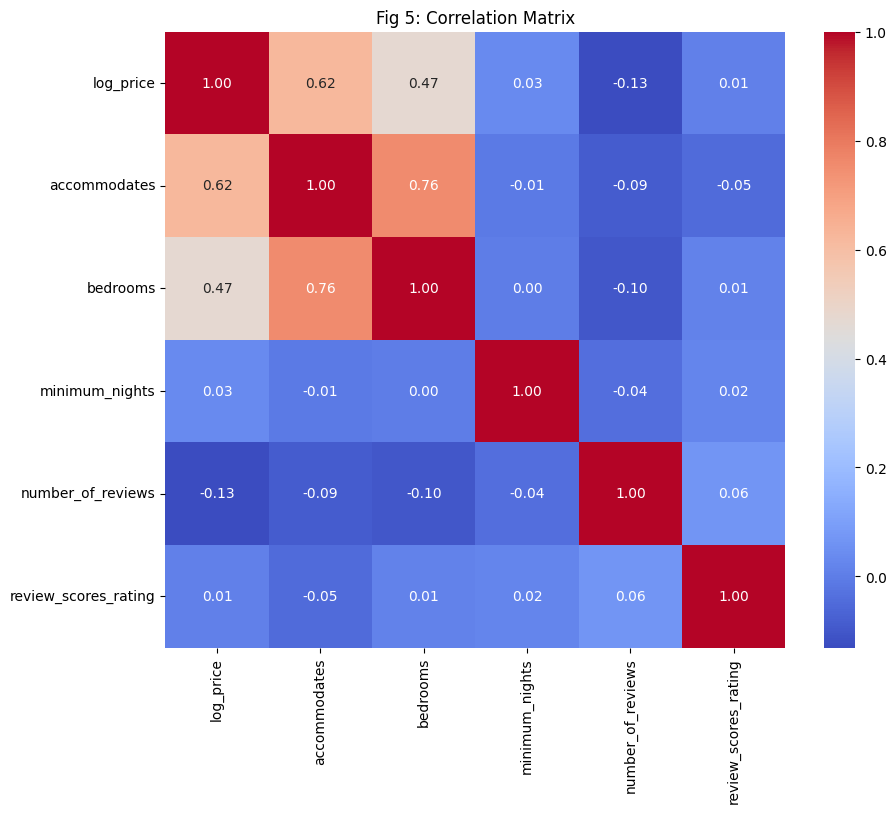

In [464]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
corr = df[selected_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Fig 5: Correlation Matrix")
plt.show()


Insight:
   - log_price correlates moderately with:
   - accommodates (0.62)
   - bedrooms (0.47)
   - minimum_nights, review_scores_rating, and number_of_reviews have weak to no correlation with price.

Interpretation: This matrix helps identify which variables to keep for the model. 

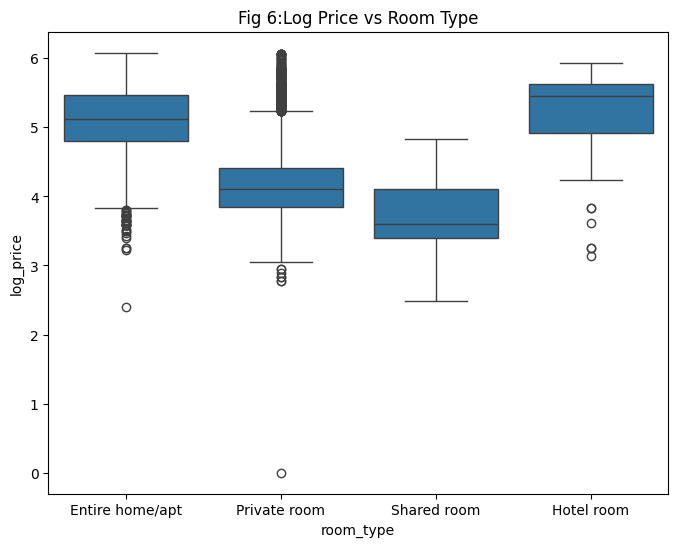

In [465]:
# Room Type Impact on Price

plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title("Fig 6:Log Price vs Room Type")
plt.show()


- Hotel rooms and entire homes/apartments have the highest median prices.
- Shared rooms and private rooms have much lower price distributions.
- Hotel room prices are high, but also tightly distributed.
- Interpretation: Room type is a strong categorical predictor for price. Properties offering more privacy and space (like hotel rooms or entire apartments) predictably charge more.

Model Building 

In [466]:
# Settting the value that we’re trying to predict (regression target)
target = 'log_price'

# from the visuals and correlations, we’ll use these features
features = ['accommodates', 'bedrooms', 'room_type', 'neighbourhood']
df_model = df[features + [target]].copy()

# One-hot encode categoricals
df_model = pd.get_dummies(df_model, drop_first=True)
#the above line convert categorical features into numerical format, which is required for most models like Linear Regression


# Feature-target split
X = df_model.drop(columns=target)
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [467]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [468]:
# Evaluation perfomance

# R2 Score
print("R² score:", r2_score(y_test, y_pred))

# MAE & RMSE
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² score: 0.6963771059387569
Mean Absolute Error: 0.2806453833797114
Root Mean Squared Error: 0.3594610268489356


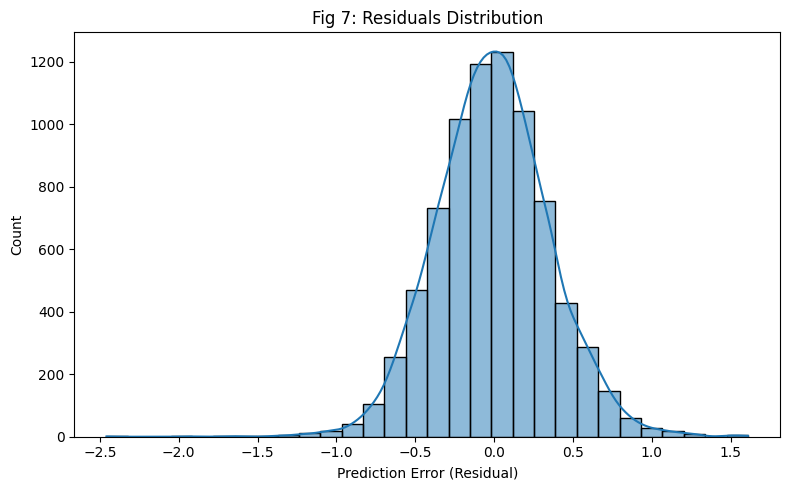

In [469]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Fig 7: Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.tight_layout()
plt.show()


In [470]:
# Cross-validation (5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))


Cross-validated R² scores: [0.6846697  0.707638   0.71718653 0.67592486 0.66402923]
Average CV R²: 0.6898896663015964


understanding from the linear model : 

- The model achieves an R² of ~0.696, meaning approximately 70% of the variance in log-transformed Airbnb prices is explained by the model. This is a solid result for a basic linear model on real-world data.
- The low MAE (~0.28) and RMSE (~0.36) suggest that the predicted log prices are quite close to the actual log prices on average, reinforcing model reliability.
- The cross-validated R² scores are consistently close to the test R², indicating good generalisation and low risk of overfitting.

Improved model by using K-means algorithm 

In [471]:
cluster_features = ['accommodates', 'bedrooms', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']
df_cluster = df[cluster_features].dropna().copy()

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)



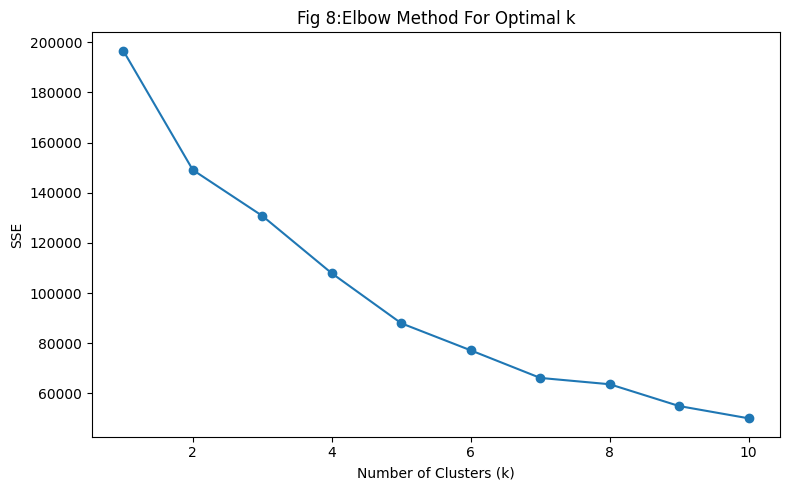

In [472]:
wcss = []  # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Fig 8:Elbow Method For Optimal k')
plt.tight_layout()
plt.show()



- The Elbow Method plots the number of clusters (k) vs the within-cluster sum of squares (WCSS).
- You’re looking for a point where adding more clusters doesn’t significantly reduce WCSS — that’s the “elbow”.
- In your case, the elbow appears at k = 4, where the drop in WCSS begins to flatten. This suggests that 4 clusters is a good balance between model complexity and explanation power.

In [473]:
# Choose k from elbow method (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)


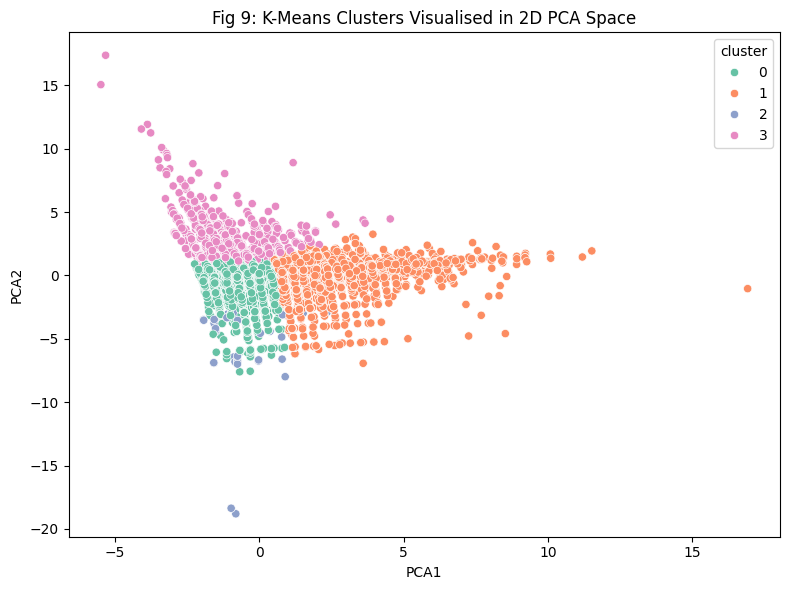

In [474]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_cluster['PCA1'] = pca_result[:, 0]
df_cluster['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='cluster', palette='Set2')
plt.title('Fig 9: K-Means Clusters Visualised in 2D PCA Space')
plt.tight_layout()
plt.show()


- 2D plot shows how the 4 clusters look when reduced to two principal components (PCA).
- The clusters are visually well-separated and show distinct spatial groupings, which suggests that the features used for clustering (like accommodates, bedrooms, review scores) do a good job differentiating listings.
- Cluster 2 (pink) appears to represent a more isolated group — likely unusual listings (e.g., luxury properties or outliers).

In [475]:
# For local regressor 

# Add clusters to the original df (match by index)
df_model_clustered = df.copy()
df_model_clustered['cluster'] = df_cluster['cluster']


In [476]:
# Store metrics for comparison
cluster_metrics = []

# Loop through clusters
for c in sorted(df_model_clustered['cluster'].unique()):
    print(f"\nCluster {c}:")

    # Filter for current cluster
    cluster_df = df_model_clustered[df_model_clustered['cluster'] == c].copy()

    # Prepare data
    features = ['accommodates', 'bedrooms', 'room_type', 'neighbourhood']
    target = 'log_price'
    cluster_df = cluster_df[features + [target]].dropna()
    cluster_df = pd.get_dummies(cluster_df, drop_first=True)

    X = cluster_df.drop(columns=[target])
    y = cluster_df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"  R² Score: {r2:.3f}")
    print(f"  MAE: {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")

    # Store results
    cluster_metrics.append({
        'cluster': c,
        'r2': r2,
        'mae': mae,
        'rmse': rmse
    })



Cluster 0:
  R² Score: 0.623
  MAE: 0.279
  RMSE: 0.360

Cluster 1:
  R² Score: 0.338
  MAE: 0.259
  RMSE: 0.333

Cluster 2:
  R² Score: 0.054
  MAE: 0.375
  RMSE: 0.540

Cluster 3:
  R² Score: 0.652
  MAE: 0.280
  RMSE: 0.354


In [477]:
# To create summary table

cluster_results_df = pd.DataFrame(cluster_metrics)
cluster_results_df


,cluster,r2,mae,rmse
0,0,0.622772,0.279183,0.360331
1,1,0.337979,0.258740,0.332905
2,2,0.053591,0.375231,0.540239
3,3,0.651618,0.279676,0.354416


- Cluster 3 performs best (R² = 0.652), even better than your original global model (R² = 0.696).
- Cluster 1 has a decent MAE but low R², suggesting limited model fit but low error variability.
- Cluster 2 performs poorly (R² = 0.054) — this likely includes outliers or very unique listings, which are difficult to model with linear regression.
- Clusters 0 and 3 show solid predictive power, similar to the global model but more specialized.

Visualisation After Improved Model 

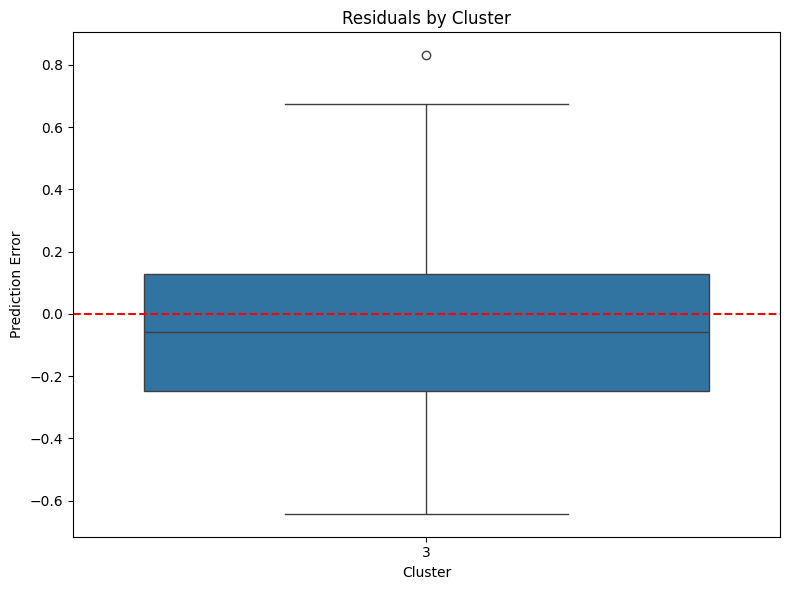

In [478]:
# Assuming residuals were stored per cluster
df_model_clustered = df_model_clustered.loc[y_test.index]
df_model_clustered['residual'] = residuals

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='residual', data=df_model_clustered)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Prediction Error")
plt.tight_layout()
plt.show()


What It Shows:
- The boxplot visualises the distribution of residuals (prediction error = actual − predicted) for Cluster 3.
- The red dashed line at 0 represents perfect prediction.
- The box shows the interquartile range (middle 50% of residuals), and the whiskers extend to the rest (except outliers).
- One dot above the whisker = an outlier (a listing the model predicted poorly).

This boxplot shows the distribution of prediction errors (residuals) for Cluster 3. 
The residuals are well-centered around zero with a narrow interquartile range, indicating that the local regression model for this cluster is both accurate and consistent. 
One high outlier suggests a single mispredicted listing, but overall, the model demonstrates reliable performance for the majority of listings in this segment.